# Lecture-02 Snell's Law
* author : Wei-Kai Lee
* Data : 2019/12/03

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Snell's Law
Snell's Law is an equation describing the relation between the angle of the incident ray and the angle of the refracted ray. $n_i$ and $n_t$ is the refractive index of the incident material and the transmissive material, respectively. Besides, $\theta_i$ is the incident angle and $\theta_t$ is the transmissive angle as in **Fig. 1**.


<img src="Lecture-2-Material/Fig-1 Snells Law.jpg" width="600" />

$$Fig. 1. (a) n_t<n_i (b) n_t>n_i $$



<font size="4">Snell's Law:</font>

<font size="4">$$n_isin\theta_i = n_tsin\theta_t$$</font>

From Snell's Law, it is obvious that if $n_t<n_i$, $\theta_t$ would be larger than $\theta_i$ as in **Fig. 1(a)**. On the other hand, if $n_t>n_i$, $\theta_t$ would be smaller than $\theta_i$ as in **Fig. 1(b)**.

In [2]:
def SnellLaw(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_i = np.array( theta_i, dtype=np.complex_ )
    
    # theta_t : refractive angle
    theta_t = np.arcsin( (ni/nt) * np.sin(theta_i) )
    return theta_t

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


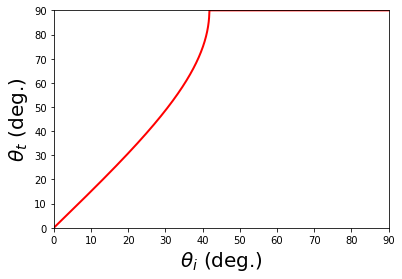

In [3]:
theta_i = np.linspace(0, np.pi/2, 10000)
theta_t = SnellLaw( theta_i, ni = 1.5, nt = 1.0)

## plot data
fig, axes = plt.subplots(1,1)
axes.plot( theta_i*180/np.pi, theta_t*180/np.pi, 'r-', linewidth=2.0)
axes.set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes.set_ylabel(r'$\theta_t$ (deg.)', fontsize=20)
plt.xlim( 0, 90);
plt.ylim( 0, 90);

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


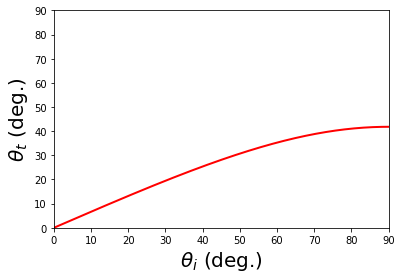

In [4]:
theta_i = np.linspace(0, np.pi/2, 1000)
theta_t = SnellLaw( theta_i, ni = 1.0, nt = 1.5)

## plot data
fig, axes = plt.subplots(1,1)
axes.plot( theta_i*180/np.pi, theta_t*180/np.pi, 'r-', linewidth=2.0)
axes.set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes.set_ylabel(r'$\theta_t$ (deg.)', fontsize=20)
plt.xlim( 0, 90);
plt.ylim( 0, 90);

* From Snell's Law, critical angle, $\theta_c$, can be defined as 
$$\theta_c=sin^{-1}(\frac{n_t}{n_i})$$

In [5]:
def CriticalAngle( ni, nt):
    return np.arcsin( nt/ni ) if nt<=ni else np.pi/2 

In [6]:
print( 'From ni=1.0 into nt=1.5, critical angle is {0:>.2f} degree'.format( CriticalAngle( 1.0, 1.5) * 180/np.pi ) )
print( 'From ni=1.5 into nt=1.0, critical angle is {0:>.2f} degree'.format( CriticalAngle( 1.5, 1.0) * 180/np.pi ) )

From ni=1.0 into nt=1.5, critical angle is 90.00 degree
From ni=1.5 into nt=1.0, critical angle is 41.81 degree


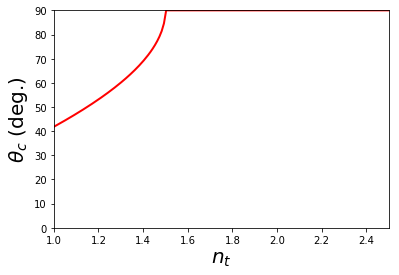

In [7]:
ni = 1.5;
nt_list = np.linspace(1.0, 2.5, 150)

## find critical angles
CA_List = np.zeros( nt_list.size, dtype=np.float64 )
for ii in range( len( nt_list ) ):
     CA_List[ii] = CriticalAngle( ni, nt_list[ii] )
        
## plot data
fig, axes = plt.subplots(1,1)
axes.plot(nt_list, CA_List*180/np.pi, 'r-', linewidth=2.0)
axes.set_xlabel(r'$n_t$', fontsize=20)
axes.set_ylabel(r'$\theta_c$ (deg.)', fontsize=20)
plt.xlim( np.min(nt_list), np.max(nt_list));
plt.ylim( 0, 90);

## But how does  Snell's Law come from?
In the physics of senior high school, the teacher would tell us that the light is in wave nature. Here, we'll going to use wave property to prove the Snell's Law.

As in **Fig.2.**, the wave front should be normal to the propagation direction and besides, the propagation vector is parallel to the wave vector $\textbf{k}=(k_x,k_y,k_z)$ and the relation between $k_x,k_y,k_z$, refractive index (n), and the angular frequency, $\omega$, is 

<font size="4">$$(nk_0)^2 = k^2 = k_x^2 + k_y^2 + k_z^2$$</font>
<font size="4">$$k_o = \omega/c = 2\pi/\lambda$$</font>

where c is the speed of light in vacuum and $k_o$ is the wave number in vacuum.


Besides, as shown in **Fig. 2.**, according to the boundary condition, the wavelength along the surface should be continuous in both the incident material and the transmissive material. (i.e. $\lambda_{x,i}=\lambda_{x,t}$ and $\lambda_{y,i}=\lambda_{y,t}$ ). Besides, as discussed in **Lecture 1**, the components of the wave vector can be quitely write down by the wavelength along the arbitraty direction (i.e. $k_x = 2\pi/\lambda_x$). So the tangential wave number should also be continuous on the boundary. Then, 

<font size="4">$$k_{x,i}=k_{x,t}$$</font>
<font size="4">$$k_{y,i}=k_{y,t}$$</font>

As a result, the z component of the wave vector in material 1 and material 2 can be calculated as the following blocks.
<img src="Lecture-2-Material/Fig-2 Snells Law.jpg" width="400" >
$$Fig. 2. $$



In [8]:
def cal_kz(k, kx, ky):
    # n : refractive index
    # ko : wave number in vacuum
    # kx : wave number along x-axis
    # ky : wave number along y-axis
    kz = np.sqrt( k**2 - kx**2 - ky**2, dtype=np.complex_ )
    # process floating
    mask = np.abs( np.real(kz) )<1e-15  
    kz[mask] = 1j * np.imag( kz[mask] )
    mask = (np.real(kz)==0) & (np.imag( kz )<0)
    kz[mask] = -kz[mask]
    return kz

In [9]:
wavelength = 550 # incident wavelength (nm)
ko = 2 * np.pi/wavelength # wave number in vacuum
ni = 1.5 # refractive index of incident material
nt = 1.0 # refractive index of transmissive material

<font size="4">$$k_x = ksin\theta cos\phi$$</font>
<font size="4">$$k_y = ksin\theta sin\phi$$</font>
<font size="4">$$k_z = kcos\theta$$</font>

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


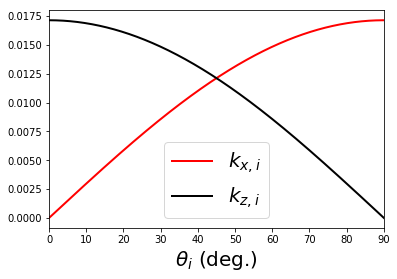

In [10]:
k_i = ni * ko
theta_i = np.linspace(0, np.pi/2, 1000, dtype=np.complex_)
phi_i = np.zeros( theta_i.size, dtype=np.complex_)
kx_i = k_i * np.sin(theta_i) * np.cos(phi_i)
ky_i = k_i * np.sin(theta_i) * np.sin(phi_i)
kz_i = cal_kz(k_i, kx_i, ky_i)

## plot data
fig, axes = plt.subplots(1,1)
axes.plot(theta_i*180/np.pi, kx_i, 'r-', linewidth=2.0)
axes.plot(theta_i*180/np.pi, kz_i, 'k-', linewidth=2.0)
axes.set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes.legend([r'$k_{x,i}$', r'$k_{z,i}$'], fontsize=20)
plt.xlim( 0, 90);

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


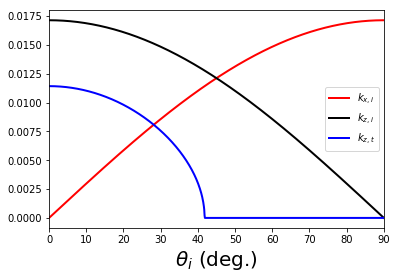

In [11]:
k_t = nt * ko
kx_t, ky_t = kx_i, ky_i # continuity in tangential components of the wave vector
kz_t = cal_kz(k_t, kx_t, ky_t)

## plot data
fig, axes = plt.subplots(1,1)
axes.plot(theta_i*180/np.pi, kx_i, 'r-', linewidth=2.0)
axes.plot(theta_i*180/np.pi, kz_i, 'k-', linewidth=2.0)
axes.plot(theta_i*180/np.pi, kz_t, 'b-', linewidth=2.0)

axes.set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes.legend([r'$k_{x,i}$', r'$k_{z,i}$', r'$k_{z,t}$'], fontsize=10)
plt.xlim( 0, 90);

Up to now, we have calculated the wave vector of the refracted light, hence the refracted angle can be calculated as:

<font size="4">$$\theta = cos^{-1}(\frac{k_z}{k})$$</font>

In [12]:
def cal_theta_from_vector(vx, vy, vz):
    v_len = np.sqrt( vx**2 + vy**2 + vz**2)
    theta = np.arccos( vz/v_len )
    return theta

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


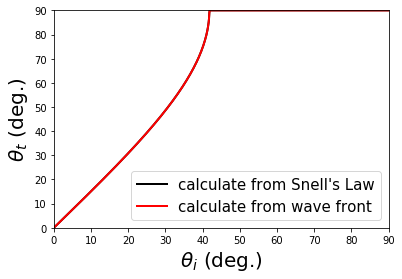

In [13]:
theta_t = cal_theta_from_vector(kx_t, ky_t, kz_t)
theta_t_SL = SnellLaw(theta_i, ni, nt)

## plot data
fig, axes = plt.subplots(1,1)
axes.plot( theta_i*180/np.pi, theta_t_SL*180/np.pi, 'k-', linewidth=2.0)
axes.plot( theta_i*180/np.pi, theta_t*180/np.pi, 'r-', linewidth=2.0)
axes.set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes.set_ylabel(r'$\theta_t$ (deg.)', fontsize=20)
axes.legend(["calculate from Snell's Law", "calculate from wave front"], fontsize=15)
plt.xlim( 0, 90);
plt.ylim( 0, 90);

From the calculation in the previous steps, the tangential components of the wave vectors are continuous on the boundary. However, the normal components of the wave vectors are not continuous and they should depend on the refractive index of the material and the tangential wave vector components. Because the value of the z component would be changed in the different material, the angle of the ray should be followingly adjusted, which would correspond to the Snell's Law and it was also proved by the previous simulation. As a result, Snell's Law is one of the phenomenon of the wave nature of light.